In [1]:
import os
import numpy as np
from scipy.io import loadmat,savemat
import nibabel as nib

import matplotlib.pyplot as plt

import torch



We are going to Read Nifti Files below

In [2]:
nifti_path = r'/Users/kurtschilling/Data/harmonization/sA/A/norm_dwi_SHfitOrder4_EvenOdd2_SH3000.nii.gz'
nifti_path = os.path.normpath(nifti_path)

img = nib.load(nifti_path)
data = img.get_fdata()

In [3]:
data.shape

(96, 96, 60, 15)

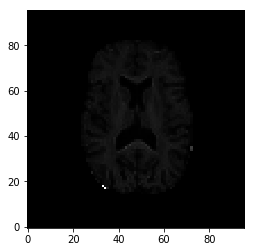

In [4]:
mid_slice = data.shape[2] // 2
plt.imshow(data[:,:,mid_slice,0].T, cmap='gray', origin='lower')
plt.show()


In [5]:
# Mask Path and Loading
mask_path = r'/Users/kurtschilling/Data/harmonization/sA/A/mask.nii.gz'
mask_path = os.path.normpath(mask_path)

mask_img = nib.load(mask_path)
mask = mask_img.get_fdata()
mask.shape

(96, 96, 60)

In [6]:
dims = mask.shape
print('Dimension of the Mask are \n')
print(dims)

Dimension of the Mask are 

(96, 96, 60)


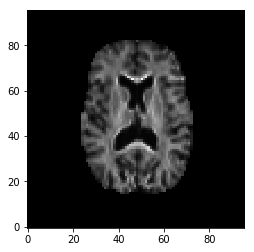

In [7]:
out_path = r'/Users/kurtschilling/Data/harmonization/sA/B/norm_dwi_SHfitOrder4_EvenOdd2_SH3000.nii.gz'
out_path = os.path.normpath(out_path)

o_img = nib.load(out_path)
o_data = o_img.get_fdata()

mid_slice = o_data.shape[2] // 2
plt.imshow(o_data[:,:,mid_slice,0].T, cmap='gray', origin='lower')
plt.show()

In [8]:
num = np.count_nonzero(mask)
print(num)

X = np.zeros((num,15))
Y = np.zeros((num,15))
index = 0
for i in range(dims[0]):
    for j in range(dims[1]):
        for k in range(dims[2]):
            if (mask[i,j,k] == 1):
                
                temp_sh_ip = data[i,j,k,:]
                temp = np.array(temp_sh_ip)
                temp = temp.T
                
                temp_sh_ip2 = o_data[i,j,k,:]
                temp2 = np.array(temp_sh_ip2)
                temp2 = temp2.T
                #print(temp_sh_ip.shape)
                
                X[index,:] = temp
                Y[index,:] = temp2
                index += 1
                
print(X.shape)
print(Y.shape)
            

84365
(84365, 15)
(84365, 15)


In [9]:
print(X)
print(X.dtype)
print(X[12,:])

[[ 9.49691653e-01 -9.89384502e-02  5.22220209e-02 ... -2.21090559e-02
   1.10347029e-02 -1.92060880e-02]
 [ 5.98976552e-01 -8.14628676e-02 -1.19196605e-02 ...  3.89557481e-02
   5.74630406e-03  2.00435461e-04]
 [ 3.46236497e-01 -6.38311282e-02  3.00795436e-02 ... -4.52243164e-03
   8.28683376e-03 -4.06144653e-03]
 ...
 [ 3.16777974e-01  1.48995090e-02  1.26995631e-02 ... -4.44003567e-03
   2.39976961e-03  7.61558302e-03]
 [ 4.25807983e-01  7.04439729e-03  6.93444163e-03 ... -7.19416374e-03
  -3.84271145e-03 -5.12936525e-03]
 [ 3.91384780e-01 -3.29091772e-03 -2.45311167e-02 ...  7.04144314e-03
   2.81537976e-03  2.14731134e-03]]
float64
[ 1.17918275e-01 -2.82259658e-02 -1.36122108e-05 -9.43136029e-03
  2.70258822e-03 -1.51425917e-02 -1.52670755e-03 -5.72741637e-03
  1.59437058e-03 -4.90370672e-03  1.26289763e-03  3.49763315e-04
  1.24182412e-03  8.00523162e-03  4.79844073e-03]


In [10]:
print(Y)
print(Y.dtype)

[[ 3.31935108e-01 -1.62949245e-02 -1.75707005e-02 ...  1.30695011e-03
   1.53167825e-03 -3.45649128e-03]
 [ 4.22008395e-01 -1.61839109e-02  1.75551195e-02 ...  5.78307966e-03
  -4.86385310e-03 -7.69814593e-04]
 [ 4.09705073e-01 -2.72899829e-02 -5.67432866e-03 ...  2.61530280e-04
  -8.84804875e-04  4.88408084e-04]
 ...
 [ 5.01835287e-01 -6.50745537e-03  3.47751714e-02 ... -1.56805990e-03
  -1.27911568e-04  6.38413196e-03]
 [ 4.42578048e-01 -3.79809029e-02 -8.91749002e-03 ... -2.91226059e-03
   3.27009801e-03  2.13469670e-04]
 [ 3.36586356e-01 -1.90302394e-02 -1.91237833e-02 ...  7.72789260e-03
   3.87520995e-03  6.25888235e-04]]
float64


In [11]:
x = torch.Tensor(2,3)

In [12]:
x

tensor([[ 0.0000e+00,  8.5899e+09, -2.5382e+06],
        [ 2.0005e+00,  4.2981e+21,  6.3828e+28]])

In [13]:
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.utils.data import Dataset
from torch.autograd import Variable
from torchvision import transforms

In [157]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1 * 15, 400)
        self.fc2 = nn.Linear(400,200)
        self.fc3 = nn.Linear(200,50)
        self.fc4 = nn.Linear(50,200)
        self.fc5 = nn.Linear(200,15)
        
def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = self.fc5(x)
    return F.linear(x)
        
net = Net()
print(net)  

optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
criterion = nn.MSELoss()

Net(
  (fc1): Linear(in_features=15, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=200, bias=True)
  (fc5): Linear(in_features=200, out_features=15, bias=True)
)


In [158]:
class SHDataSet(Dataset):
    def __init__(self,X,Y):
        
        self.X = X
        self.Y = Y
        self.to_tensor = transforms.ToTensor()
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, i):
        
        vec_a = np.reshape(self.X[i,:],(15, 1, 1))
        vec_b = np.reshape(self.Y[i,:],(15, 1, 1))
        a = self.to_tensor(vec_a)
        b = self.to_tensor(vec_b)
    
        return a,b

In [159]:
shset = SHDataSet(X,Y)

In [160]:
shset.X
m = shset.X[12,:]
m.shape
n = np.reshape(m,(-1, 15))
n.shape
#m.shape
shset[12]

(tensor([[[ 0.1179],
          [-0.0282],
          [-0.0000],
          [-0.0094],
          [ 0.0027],
          [-0.0151],
          [-0.0015],
          [-0.0057],
          [ 0.0016],
          [-0.0049],
          [ 0.0013],
          [ 0.0003],
          [ 0.0012],
          [ 0.0080],
          [ 0.0048]]], dtype=torch.float64), tensor([[[ 0.2906],
          [-0.0119],
          [ 0.0024],
          [ 0.0211],
          [ 0.0041],
          [ 0.0041],
          [ 0.0029],
          [ 0.0023],
          [-0.0040],
          [ 0.0001],
          [ 0.0005],
          [-0.0003],
          [-0.0029],
          [ 0.0017],
          [ 0.0022]]], dtype=torch.float64))

In [161]:
net.train()

Net(
  (fc1): Linear(in_features=15, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=200, bias=True)
  (fc5): Linear(in_features=200, out_features=15, bias=True)
)

In [163]:
epochs = 10
batch_idx = 0
for epoch in range(epochs):
    print(epoch)
    for batch_idx, (data, target) in enumerate(shset):
        print(batch_idx)
        data, target = Variable(data), Variable(target)
        # resize data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
        data = data.view(1, 1*15)
        optimizer.zero_grad()
        net_out = net(data)
        loss = criterion(net_out, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data), len(shset.dataset),
                           100. * batch_idx / len(train_loader), loss.data[0]))

0
0


NotImplementedError: 

In [107]:
from keras.layers import Input, Dense, Activation
from keras.models import Model
from keras.models import Sequential

from keras.optimizers import SGD, adam, nadam, Adagrad

Using TensorFlow backend.


In [291]:
def keras_network():
    
    model = Sequential()
    model.add(Dense(28, input_shape=(28,)))
    model.add(Dense(100))
    model.add(Activation("relu"))
    model.add(Dense(50))
    model.add(Activation("relu"))
    model.add(Dense(50))
    model.add(Activation("relu"))
    model.add(Dense(200))
    #model.add(Activation("relu"))
    model.add(Dense(15))

    model.compile(loss='mse', optimizer='RMSProp', metrics=['mse','mae'])
    model.summary()
    return model

In [292]:
def train_keras(model, X, y, val_size=0.1, n_epoch=1000):
    
    model.fit(X,y, epochs=n_epoch, batch_size=10000, verbose=1, shuffle=True, validation_split=val_size)
    return model

In [308]:
model_D = keras_network()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_131 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_132 (Dense)            (None, 100)               2900      
_________________________________________________________________
activation_69 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_133 (Dense)            (None, 50)                5050      
_________________________________________________________________
activation_70 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_134 (Dense)            (None, 50)                2550      
_________________________________________________________________
activation_71 (Activation)   (None, 50)                0         
__________

In [ ]:
X[np.isnan(X)] = 0
Y[np.isnan(Y)] = 0
X[np.isinf(X)] = 0
Y[np.isinf(Y)] = 0

In [295]:
#X = np.random.random((num, 28))
#Y = np.random.random((num, 15))

In [309]:


X = np.random.uniform(low=-5e-5, high=5e-5,size=(num, 28))
Y = np.random.uniform(low=-5e-5, high=5e-5,size=(num, 15))

In [310]:
X

array([[-2.25302469e-05,  2.31159493e-07, -9.05797722e-06, ...,
        -8.58872694e-06,  2.63106250e-05,  3.66547571e-05],
       [ 3.44056969e-05, -4.92702453e-05,  4.79636582e-06, ...,
         1.11350236e-05, -1.44882474e-05,  1.35976231e-05],
       [ 1.84436599e-05,  2.94361567e-05,  3.90459702e-06, ...,
         1.45529469e-05, -1.81290570e-05, -4.18433110e-05],
       ...,
       [ 1.17135193e-05, -4.58465176e-05,  3.29944169e-05, ...,
        -2.37181695e-05,  4.51175844e-05,  2.07977493e-05],
       [ 3.14390262e-05,  4.87663588e-05, -4.48239553e-05, ...,
         3.60280949e-05,  3.13167144e-05, -4.81216957e-05],
       [-4.88592614e-05, -4.17207396e-05,  3.98204767e-05, ...,
         2.90241279e-05, -4.86473138e-05,  4.79541779e-05]])

In [311]:
model_D = train_keras(model_D,X,Y,0.1,10)

Train on 75928 samples, validate on 8437 samples
Epoch 1/10
75928/75928 [==============================] - 1s 15us/step - loss: 3.2692e-05 - mean_squared_error: 3.2692e-05 - mean_absolute_error: 0.0044 - val_loss: 2.2715e-05 - val_mean_squared_error: 2.2715e-05 - val_mean_absolute_error: 0.0040
Epoch 2/10
75928/75928 [==============================] - 0s 3us/step - loss: 1.4509e-05 - mean_squared_error: 1.4509e-05 - mean_absolute_error: 0.0032 - val_loss: 6.7650e-06 - val_mean_squared_error: 6.7650e-06 - val_mean_absolute_error: 0.0022
Epoch 3/10
75928/75928 [==============================] - 0s 3us/step - loss: 4.5139e-06 - mean_squared_error: 4.5139e-06 - mean_absolute_error: 0.0017 - val_loss: 5.3265e-06 - val_mean_squared_error: 5.3265e-06 - val_mean_absolute_error: 0.0019
Epoch 4/10
75928/75928 [==============================] - 0s 4us/step - loss: 6.5200e-06 - mean_squared_error: 6.5200e-06 - mean_absolute_error: 0.0021 - val_loss: 1.4013e-05 - val_mean_squared_error: 1.4013e-05 

In [254]:
chk = np.isnan(Y)
print(np.sum(chk))

0


In [255]:
Y.shape

(84365, 15)

In [256]:
X.shape

(84365, 28)

In [160]:
Y

array([[ 3.31935108e-01, -1.62949245e-02, -1.75707005e-02, ...,
         1.30695011e-03,  1.53167825e-03, -3.45649128e-03],
       [ 4.22008395e-01, -1.61839109e-02,  1.75551195e-02, ...,
         5.78307966e-03, -4.86385310e-03, -7.69814593e-04],
       [ 4.09705073e-01, -2.72899829e-02, -5.67432866e-03, ...,
         2.61530280e-04, -8.84804875e-04,  4.88408084e-04],
       ...,
       [ 5.01835287e-01, -6.50745537e-03,  3.47751714e-02, ...,
        -1.56805990e-03, -1.27911568e-04,  6.38413196e-03],
       [ 4.42578048e-01, -3.79809029e-02, -8.91749002e-03, ...,
        -2.91226059e-03,  3.27009801e-03,  2.13469670e-04],
       [ 3.36586356e-01, -1.90302394e-02, -1.91237833e-02, ...,
         7.72789260e-03,  3.87520995e-03,  6.25888235e-04]])